In [4]:
import matplotlib.pyplot as plt
import pandas as pd 

### Load data

In [ ]:
df = pd.read_csv("../data/raw_analyst_ratings.csv", parse_dates=['date'])
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


### Add derived columns

In [3]:
# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Feature: Headline length
df['headline_length'] = df['headline'].str.len()

# Feature: Hour of the day
df['hour'] = df['date'].dt.hour

# Feature: Day of the week
df['day_of_week'] = df['date'].dt.day_name()


### Vizualize Headline Length

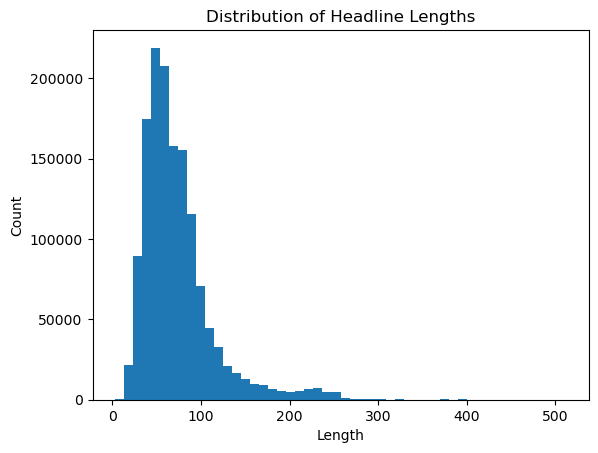

In [5]:
plt.hist(df['headline_length'], bins=50)
plt.title("Distribution of Headline Lengths")
plt.xlabel("Length")
plt.ylabel("Count")
plt.show()


### Identify Top Publishers

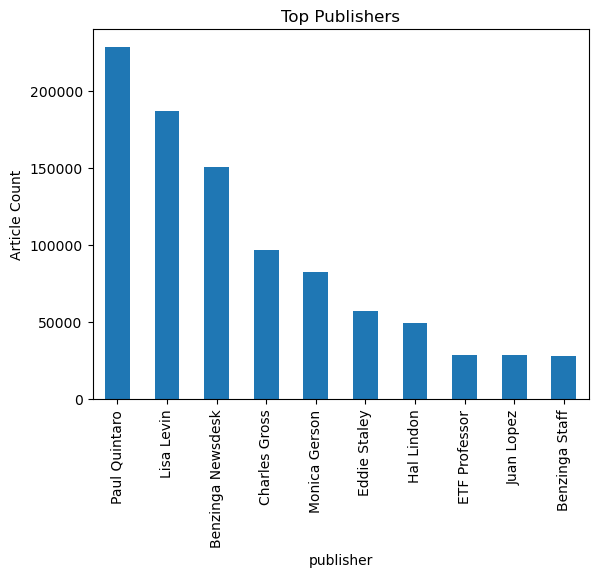

In [6]:
top_publishers = df['publisher'].value_counts().head(10)
top_publishers.plot(kind='bar', title="Top Publishers")
plt.ylabel("Article Count")
plt.show()

### News Volume over Time

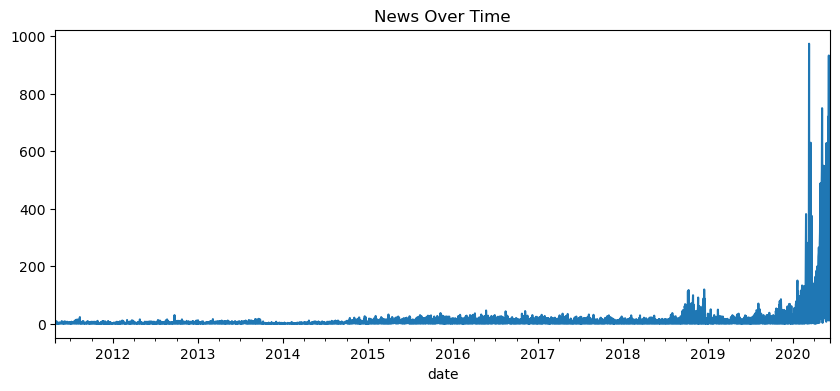

In [7]:
df.set_index('date', inplace=True)
df.resample('D').size().plot(figsize=(10, 4), title="News Over Time")
plt.show()


### Time-of-Day Heatmap

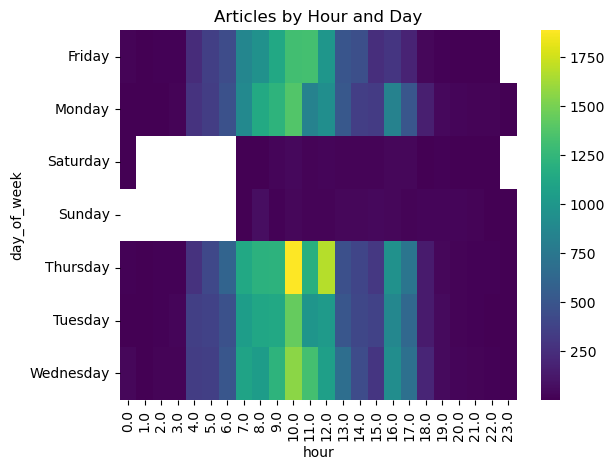

In [8]:
import seaborn as sns
pivot = df.groupby(['day_of_week', 'hour']).size().unstack()
sns.heatmap(pivot, cmap='viridis')
plt.title("Articles by Hour and Day")
plt.show()